Tianyou Xiao (tx43), Ziyu Song (zs363)

CS 5785 HW 4 Clustering for Text Analysis

In [46]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
import random
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

In [47]:
docword = np.load("science2k-doc-word.npy")
worddoc = np.load("science2k-word-doc.npy")
print(docword.shape)
print(worddoc.shape)

(1373, 5476)
(5476, 1373)


In [48]:
titles = pd.read_table('science2k-titles.txt', header=None).values
vocab = pd.read_table('science2k-vocab.txt', header=None).values

In [49]:
# source: https://medium.com/@rishit.dagli/build-k-means-from-scratch-in-python-e46bf68aa875
class K_Means:
    def __init__(self, k=5, tol=0.001, max_iter=200):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}
        # random.seed(0)
        initial_centroids = random.sample([i for i in range(len(data))], self.k)

        for i in range(self.k):
            self.centroids[i] = data[initial_centroids[i]]

        for i in range(self.max_iter):
            self.classifications = {}
            self.pred = []

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
                self.pred.append(classification)

            # prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)


    def predict(self, data=None):
        if data:
            classification = []
            for data in dataset:
                distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
                classification.append(distances.index(min(distances)))
            return np.asarray(classification)

        return np.asarray(self.pred)


    def evaluate(self, dataset):
        pred = self.predict()
        centroids = [self.centroids[i] for i in pred]
        error_sum =  0
        for i in range(len(centroids)):
            c = centroids[i]
            error_sum += np.linalg.norm(dataset[i]-c)

        return error_sum


In [50]:
def testDifferentKValue(k_value_range, data):
    errors = []
    for k in k_value_range:
        kmeans = K_Means(k=k)
        kmeans.fit(data)
        errors.append(kmeans.evaluate(data))

    return errors

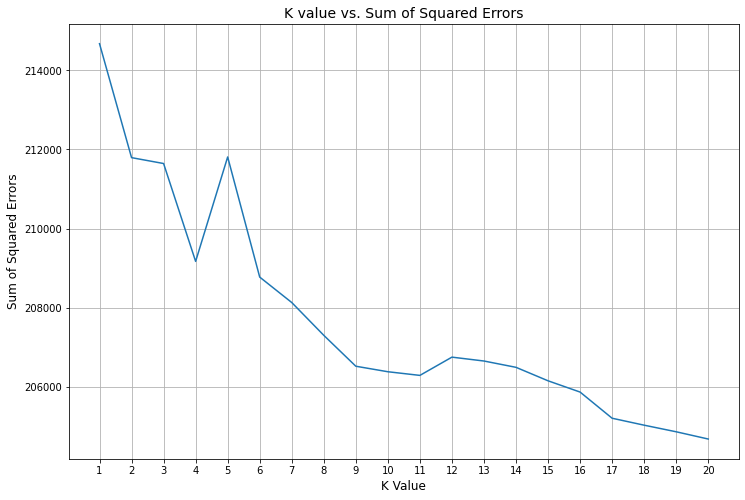

In [6]:
ks = [i for i in range(1, 21)]
es = testDifferentKValue(ks, docword)

plt.figure(figsize=(12,8))
plt.plot(ks, es)
plt.xticks([x for x in range(1,21)])
plt.xlabel("K Value", fontsize=12)
plt.ylabel("Sum of Squared Errors", fontsize=12)
plt.title("K value vs. Sum of Squared Errors", fontsize=14)
plt.grid()
plt.show()

In [24]:
# choose k=5
k = 5
center = np.mean(docword, axis=0).reshape(1, -1)
kmeans = K_Means(k=k)
kmeans.fit(docword)
pred = kmeans.predict()
centroids = kmeans.centroids
for i in range(k):
    # farthest = np.argsort(euclidean_distances(docword[pred == i], center),axis=0)[:10]
    farthest = np.argsort(abs(centroids[i]-center).tolist())[0][:10]
    words = [vocab[v].tolist()[0] for v in farthest]
    print('i = %s' % i)
    print('words = ', words)
    print('--------------------------------------------------')

i = 0
words =  ['retain', 'extraction', 'metals', 'oxidative', 'cns', 'nmr', 'unrelated', 'sucrose', 'threefold', 'oscillation']
--------------------------------------------------
i = 1
words =  ['result', 'second', 'research', 'nature', 'addressed', 'science', 'correspondence', 'end', 'references', 'contrast']
--------------------------------------------------
i = 2
words =  ['loading', 'soil', 'prior', 'regulates', 'consensus', 'offer', 'investigation', 'meet', 'easy', 'explains']
--------------------------------------------------
i = 3
words =  ['protected', 'madison', 'evol', 'develop', 'candidates', 'patterning', 'daily', 'bax', 'barrier', 'recycling']
--------------------------------------------------
i = 4
words =  ['computing', 'telescope', 'train', 'explaining', 'attraction', 'oxford', 'interacting', 'radar', 'localized', 'permit']
--------------------------------------------------


In [25]:
# centroids = kmeans.cluster_centers_
for i in range(k):
    closest = np.argsort(euclidean_distances(docword[pred == i], centroids[i].reshape(1, -1)), axis=0)[-10:]
    ts = np.block([titles[t] for t in [x for x in closest]])
    print('i = %s \nClosest= %s\nTitles = %s' %(i, closest.reshape(1,-1),ts))
    print('--------------------------------------------------')

i = 0 
Closest= [[259 453  23  83  35 114 179 568 172 532]]
Titles = [["Tracing Leptin's Partners in Regulating Body Weight"
  'Information Technology Takes a Different Tack'
  'Evidence for a Low-Density Universe from the Relative Velocities of Galaxies'
  'Role of the Enteric Nervous System in the Fluid and Electrolyte Secretion of Rotavirus Diarrhea'
  'Social Mentalizing Abilities in Mental Patients'
  'Coupling of Stress in the ER to Activation of JNK Protein Kinases by Transmembrane Protein Kinase IRE1'
  'Bioinformatics in the Information Age'
  'Chromatin-Independent Nuclear Envelope Assembly Induced by Ran GTPase in Xenopus Egg Extracts'
  'A New Breed of Scientist-Advocate Emerges'
  "Prometheus: Io's Wandering Plume"]]
--------------------------------------------------
i = 1 
Closest= [[1 0]]
Titles = [["Baedeker's Guide, or Just Plain 'Trouble'?"
  'Archaeology in the Holy Land']]
--------------------------------------------------
i = 2 
Closest= [[3 0 4 2 5 1]]
Titles = [[

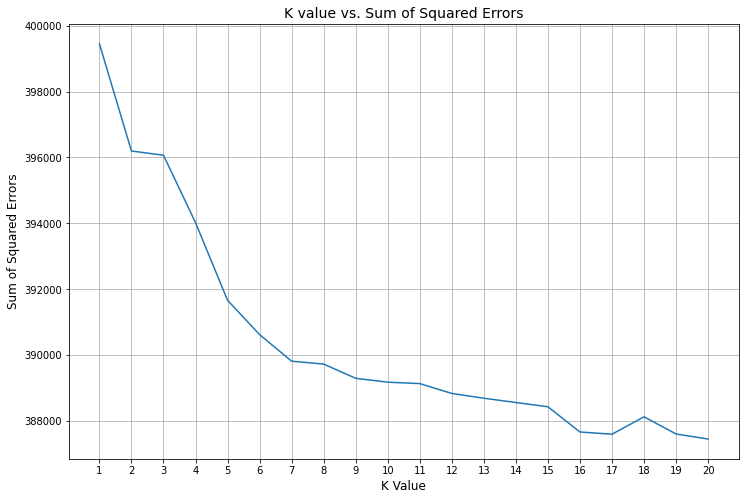

In [10]:
# (b)
ks_2 = [i for i in range(1, 21)]
es_2 = testDifferentKValue(ks_2, worddoc)

plt.figure(figsize=(12,8))
plt.plot(ks_2, es_2)
plt.xticks([x for x in range(1,21)])
plt.xlabel("K Value", fontsize=12)
plt.ylabel("Sum of Squared Errors", fontsize=12)
plt.title("K value vs. Sum of Squared Errors", fontsize=14)
plt.grid()
plt.show()

In [52]:
# choose k=6
k = 6
center_2 = np.mean(worddoc, axis=0).reshape(1, -1)
kmeans_2 = K_Means(k=k)
kmeans_2.fit(worddoc)
pred_2 = kmeans_2.predict()
centroids_2 = kmeans_2.centroids
for i in range(k):
    farthest_2 = np.argsort(abs(centroids_2[i]-center_2).tolist())[0][:10]
    words_2 = [vocab[v].tolist()[0] for v in farthest_2]
    print('i = %s' % i)
    print('words = ', words_2)
    print('--------------------------------------------------')

i = 0
words =  ['get', 'challenge', 'ratio', 'nature', 'block', 'create', 'mars', 'serum', 'phosphate', 'forms']
--------------------------------------------------
i = 1
words =  ['images', 'subunit', 'develop', 'determined', 'conventional', 'forest', 'negative', 'recent', 'allows', 'regulation']
--------------------------------------------------
i = 2
words =  ['metal', 'normally', 'estimated', 'site', 'neuronal', 'reaction', 'chemistry', 'systems', 'physical', 'orbital']
--------------------------------------------------
i = 3
words =  ['significant', 'environmental', 'top', 'web', 'rotation', 'diffusion', 'vesicles', 'host', 'mitochondrial', 'evidence']
--------------------------------------------------
i = 4
words =  ['energy', 'survival', 'proliferation', 'biology', 'affinity', 'plus', 'take', 'providing', 'extracts', 'immune']
--------------------------------------------------
i = 5
words =  ['resolution', 'late', 'gray', 'host', 'dimensional', 'mechanical', 'strand', 'tumor', 'c

In [53]:
for i in range(k):
    closest_2 = np.argsort(euclidean_distances(worddoc[pred_2 == i], centroids_2[i].reshape(1, -1)), axis=0)[-10:]
    ts_2 = np.block([titles[t] for t in [x for x in closest_2]])
    print('i = %s \nClosest = %s\nTitles = %s' %(i, closest_2.reshape(1,-1),ts_2))
    print('--------------------------------------------------')

i = 0 
Closest = [[ 4 31  1 10 29  2 21 19  8 11]]
Titles = [['Corrections and Clarifications: Commercialization of Genetic Research and Public Policy'
  'A Mammalian <latex>$H^+$</latex> Channel Generated through Alternative Splicing of the NADPH Oxidase Homolog NOH-1'
  "Baedeker's Guide, or Just Plain 'Trouble'?"
  "Charon's First Detailed Spectra Hold Many Surprises"
  'DNA Topoisomerase IIb and Neural Development'
  "Duchamp's L.H.O.O.Q.-From 1919 or 1930?"
  'Equilibrium Regained: From Nonequilibrium Chaos to Statistical Mechanics'
  'Structural Basis of Smad2 Recognition by the Smad Anchor for Receptor Activation'
  'Tracing the Origins of Salmonella Outbreaks'
  'Nota Bene: Sensing Old Age']]
--------------------------------------------------
i = 1 
Closest = [[ 9  2 31 14  0  6  4 11  1  8]]
Titles = [['Reading the Worm Genome' "Duchamp's L.H.O.O.Q.-From 1919 or 1930?"
  'A Mammalian <latex>$H^+$</latex> Channel Generated through Alternative Splicing of the NADPH Oxidase Homol